<a href="https://colab.research.google.com/github/lahfidhiba/The-Coding-School/blob/main/fraud_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

fraud_df = pd.read_csv("/content/synthetic_fraud_dataset.csv")



!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression


from sklearn.metrics import *

Saving synthetic_fraud_dataset.csv to synthetic_fraud_dataset (1).csv


In [17]:
fraud_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [18]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [22]:
fraud_df.columns = [col.replace ("_", " ") for col in fraud_df.columns]

In [23]:
fraud_df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Type,Timestamp,Account Balance,Device Type,Location,Merchant Category,IP Address Flag,...,Daily Transaction Count,Avg Transaction Amount 7d,Failed Transaction Count 7d,Card Type,Card Age,Transaction Distance,Authentication Method,Risk Score,Is Weekend,Fraud Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


For "Age," it's measured in weeks

In [24]:

fraud_df.describe()


,Transaction Amount,Account Balance,IP Address Flag,Previous Fraudulent Activity,Daily Transaction Count,Avg Transaction Amount 7d,Failed Transaction Count 7d,Card Age,Transaction Distance,Risk Score,Is Weekend,Fraud Label
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,99.411012,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,0.501556,0.299640,0.321340
std,98.687292,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,0.287774,0.458105,0.466996
min,0.000000,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,0.000100,0.000000,0.000000
25%,28.677500,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,0.254000,0.000000,0.000000
50%,69.660000,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,0.502250,0.000000,0.000000
75%,138.852500,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,0.749525,1.000000,1.000000
max,1174.140000,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,1.000000,1.000000,1.000000


In [25]:
fraud_df['Fraud Label'].value_counts()

,count
Fraud Label,
0,33933
1,16067


In [26]:
fraud_df['Risk Score'].value_counts()

,count
Risk Score,
0.6917,16
0.3606,15
0.2990,15
0.9781,14
0.2228,14
...,...
0.4741,1
0.5626,1
0.3965,1


In [27]:
numeric_columns = fraud_df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['Transaction Amount', 'Account Balance', 'IP Address Flag',
       'Previous Fraudulent Activity', 'Daily Transaction Count',
       'Avg Transaction Amount 7d', 'Failed Transaction Count 7d', 'Card Age',
       'Transaction Distance', 'Risk Score', 'Is Weekend', 'Fraud Label'],
      dtype='object')


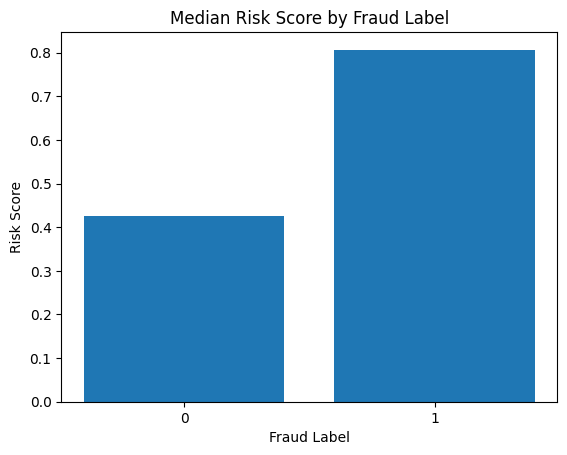

In [28]:
median_scores = fraud_df.groupby("Fraud Label")["Risk Score"].median()

plt.bar(median_scores.index.astype(str), median_scores.values)
plt.title("Median Risk Score by Fraud Label")
plt.xlabel("Fraud Label")
plt.ylabel("Risk Score")
plt.show()

Those with a risk score 0.4 and under are less prone to their transaction being labeled a fraud --> this is graphed using the median of the data.

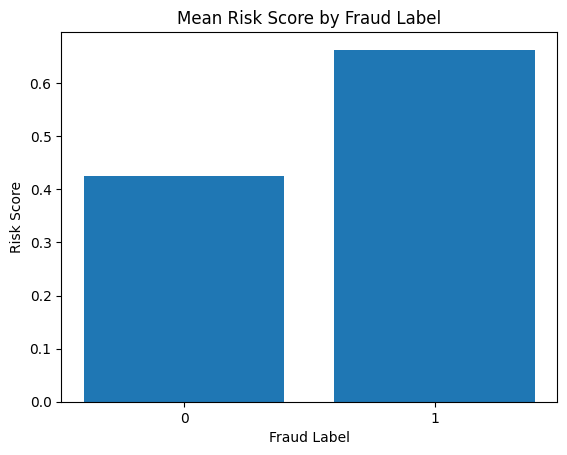

In [29]:
mean_scores = fraud_df.groupby("Fraud Label")["Risk Score"].mean()

plt.bar(mean_scores.index.astype(str), mean_scores.values)
plt.title("Mean Risk Score by Fraud Label")
plt.xlabel("Fraud Label")
plt.ylabel("Risk Score")
plt.show()

Those with a risk score 0.4 and under are less prone to their transaction being labeled a fraud --> this is proven using the mean of the data.

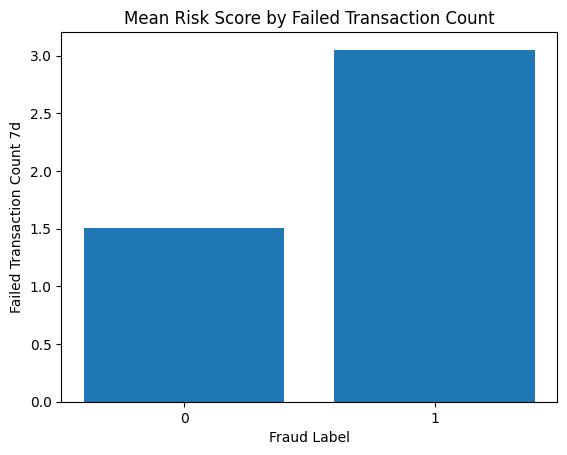

In [30]:
mean_scores = fraud_df.groupby("Fraud Label")["Failed Transaction Count 7d"].mean()

plt.bar(mean_scores.index.astype(str), mean_scores.values)
plt.title("Mean Risk Score by Failed Transaction Count")
plt.xlabel("Fraud Label")
plt.ylabel("Failed Transaction Count 7d")
plt.show()

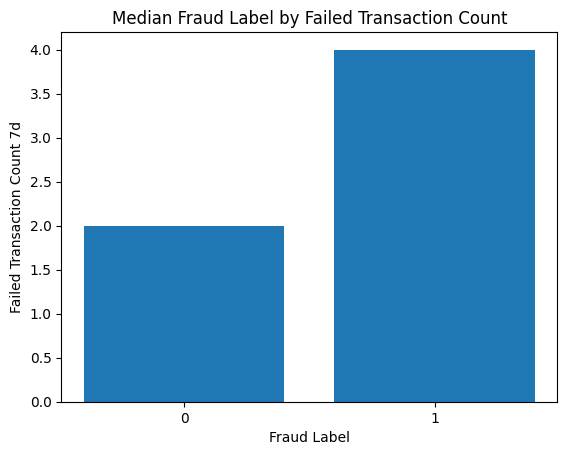

In [31]:
median_scores = fraud_df.groupby("Fraud Label")["Failed Transaction Count 7d"].median()

plt.bar(median_scores.index.astype(str), median_scores.values)
plt.title("Median Fraud Label by Failed Transaction Count")
plt.xlabel("Fraud Label")
plt.ylabel("Failed Transaction Count 7d")
plt.show()

By comparing both the mean and median graphs, I can conclude that if an account has a failed transaction count of 2 or less in 7 days, its transactions are not considered fraudulent. I can also conclude that those with fewer failed transactions are less prone to fraudulent transactions.

In [32]:
fraud_df['Fraud Label'].value_counts()

,count
Fraud Label,
0,33933
1,16067


Around 32% of transactions in the data set were fraudulent.

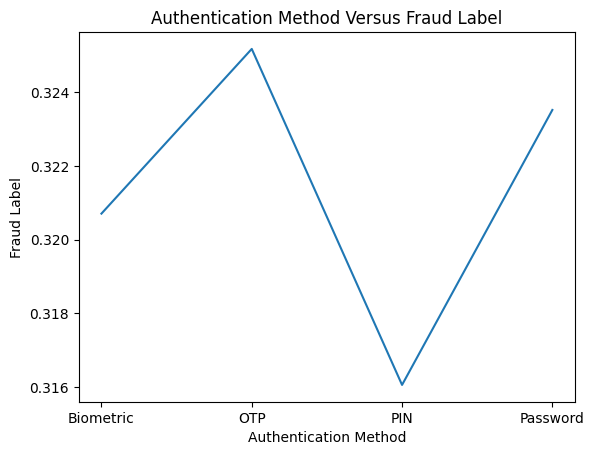

In [33]:
grouped_data = fraud_df.groupby('Authentication Method')
fraud_frac = grouped_data['Fraud Label'].mean()

x_values = fraud_frac.index
plt.plot(x_values, fraud_frac)

plt.xlabel('Authentication Method')
plt.ylabel('Fraud Label')
plt.title('Authentication Method Versus Fraud Label')

plt.show()

There is a connection between OTP and having a higher fraud label. I want to create a bar graph for this though just to double check. But the difference in minimial so I don't think it's that big of a correlation in detecting if a transaction is fraud.

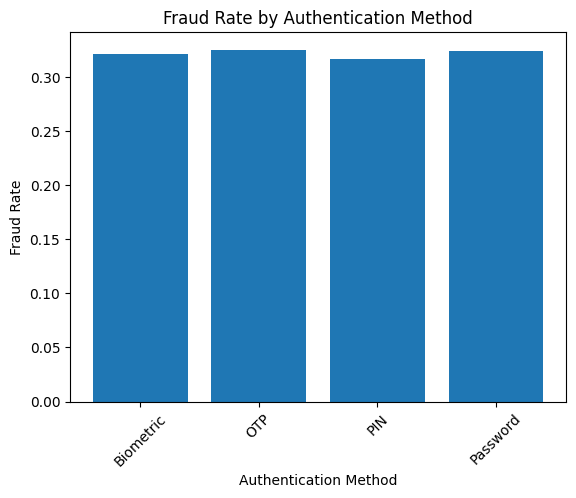

In [34]:
plt.bar(x_values, fraud_frac)
plt.xlabel('Authentication Method')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Authentication Method')
plt.xticks(rotation=45)
plt.show()

Now that I have plotted a bar graph, it confirms that there is not really a correlation --> The least correlation.

In [35]:
columns_to_drop = ['Transaction ID', 'User ID', 'Session ID', 'Time Stamp']
fraud_df = fraud_df.drop(columns=columns_to_drop, errors='ignore')

By doing this, I filterted out irrelevant variables.

In [36]:
fraud_df.head()

,Transaction Amount,Transaction Type,Timestamp,Account Balance,Device Type,Location,Merchant Category,IP Address Flag,Previous Fraudulent Activity,Daily Transaction Count,Avg Transaction Amount 7d,Failed Transaction Count 7d,Card Type,Card Age,Transaction Distance,Authentication Method,Risk Score,Is Weekend,Fraud Label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [37]:
col = 'Risk Score'

In [38]:
print(f"Summary statistics for {col}:")
print(fraud_df[col].describe())

Summary statistics for Risk Score:
count    50000.000000
mean         0.501556
std          0.287774
min          0.000100
25%          0.254000
50%          0.502250
75%          0.749525
max          1.000000
Name: Risk Score, dtype: float64


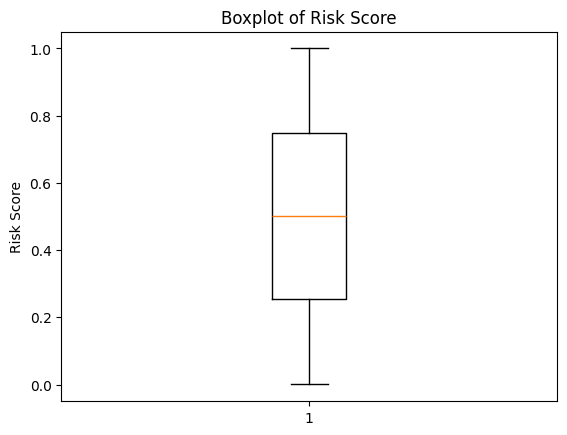

In [39]:
plt.boxplot(fraud_df[col])
plt.title(f"Boxplot of {col}")
plt.ylabel(col)
plt.show()

This means the data does not have any crazy outliers? Is this simply too perfect?

**QUESTIONS**
1. Are higher transactions more prone to being labeled as fraud?
2. Does risk score play a big role in determining whether a transaction is fraud?


In [40]:
fraud_df['Transaction Amount'].median()


69.66

Anything below 69.66 is considered a low transaction, while anything above 69.66 is regarded as a high transaction. So I'll probably graph two scatter plots? One with under the median and above maybe??

In [48]:
median_amount = fraud_df['Transaction Amount'].median()
fraud_df['amount_group'] = fraud_df['Transaction Amount'].apply(
    lambda x: 'low' if x <= median_amount else 'high')

In [51]:
print("Median Transaction Amount:", median_amount)
print(fraud_df[['Transaction Amount', 'amount_group']].head(20))

Median Transaction Amount: 69.66
    Transaction Amount amount_group
0                39.79          low
1                 1.19          low
2                28.96          low
3               254.32         high
4                31.28          low
5               168.55         high
6                 3.79          low
7                 7.08          low
8                34.25          low
9                16.24          low
10              367.50         high
11               50.44          low
12               55.50          low
13               54.09          low
14                9.66          low
15               64.78          low
16               37.11          low
17                1.58          low
18              178.56         high
19               19.37          low


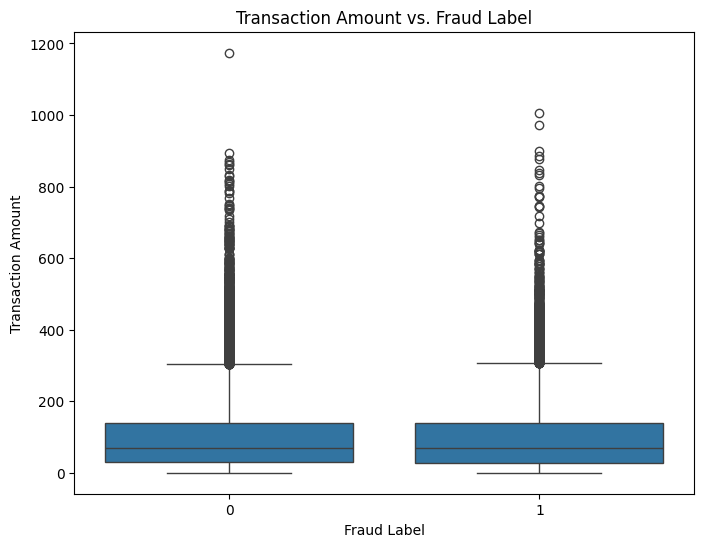

In [58]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Fraud Label', y='Transaction Amount', data=fraud_df)
plt.title('Transaction Amount vs. Fraud Label')
plt.xlabel('Fraud Label')
plt.ylabel('Transaction Amount')
plt.show()

There are more outliers for those with fraud label --> skew results. However, in this case it means that higher transactions are more likely to be considered fraudulent.

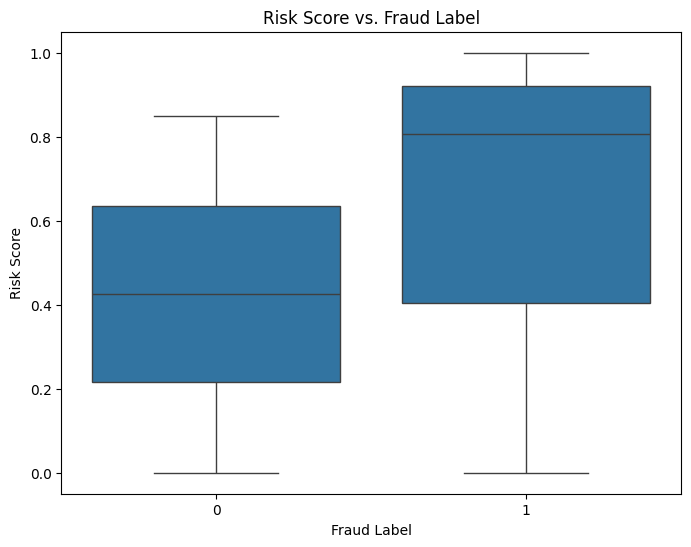

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fraud Label', y='Risk Score', data=fraud_df)
plt.title('Risk Score vs. Fraud Label')
plt.xlabel('Fraud Label')
plt.ylabel('Risk Score')
plt.show()

Just another visualization for risk score vs fraud label. Proved my point that those with higher risk scores have higher fraud label count.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [62]:
X = fraud_df[['Transaction Amount']]
y = fraud_df['Fraud Label']

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [65]:
model = KNeighborsClassifier(n_neighbors = 5)

In [66]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [67]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))

Accuracy Score:  0.6068666666666667


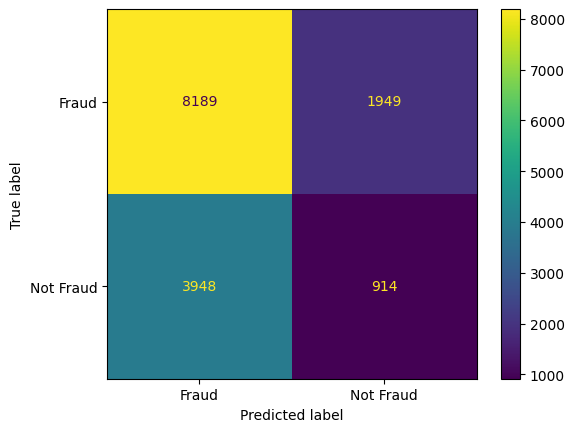

In [70]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels = ["Fraud","Not Fraud"])
plt.show()

In [73]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[8189 1949]
 [3948  914]]
